In [89]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import urllib.request
import os
import collections
import asyncio
import xlsxwriter
from csv import DictWriter
%matplotlib inline

In [99]:
def get_image(url):
    # image = cv2.imread(img)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    imageRGB = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    return imageRGB

In [101]:
def center_crop(img, dim):
	height, width = img.shape[0], img.shape[1]
    # process crop width and height for max available dimension
	# crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1] # check width
	# crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] # check height
	mid_x, mid_y = int(width/2), int(height/2)
    # cw2, ch2 = int(crop_width/2), int(crop_height/2) # crop x,y stable
	crop_img = img[mid_y-dim[0]:mid_y+dim[1], mid_x-dim[2]:mid_x+dim[3]]
	return crop_img

downloading : http://tiwrmdev.hii.or.th/ContourImg/2021/09/10/hatempY2021M09D10T12.png => success!!


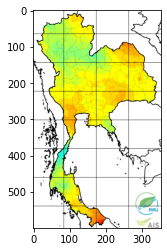

In [107]:
url_img = "http://tiwrmdev.hii.or.th/ContourImg/2021/09/10/hatempY2021M09D10T12.png"
print("downloading : %s => success!!" % url_img)
image = get_image(url_img)
modi_img = center_crop(image, (330, 270,165,186))
plt.imshow(modi_img)
plt.show()

In [95]:
img = cv2.imread('./images/hatempY2021M05D10T10.png')

white = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(white, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put mask into alpha channel of result
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[ :, :,3] = mask

# save resulting masked image
cv2.imwrite('./images/temp.png', result)

True

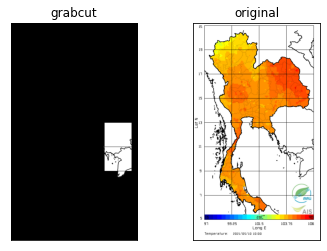

In [110]:
img  =	cv2.imread('./images/hatempY2021M05D10T10.png')
mask =	np.zeros(img.shape[:2],np.uint8)
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
 
rect =	(300,300,400,207)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
 
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  =	img*mask2[:,:,np.newaxis]
 
plt.subplot(121),  plt.imshow(img)
plt.title("grabcut"),	plt.xticks([]),	plt.yticks([])
plt.subplot(122),
plt.imshow(cv2.cvtColor(cv2.imread('./images/hatempY2021M05D10T10.png'),cv2.COLOR_BGR2RGB))
plt.title("original"),	plt.xticks([]),	plt.yticks([])
plt.show()

In [83]:
bgdModel

array([[ 2.13108410e-01,  6.64177607e-01,  5.84690134e-02,
         2.16025053e-02,  4.26424640e-02,  0.00000000e+00,
         1.31316733e+02,  2.51267536e+02,  2.55000000e+02,
         2.55000000e+02,  2.55000000e+02,  8.10424072e+00,
         8.10424072e+00,  8.10424072e+00,  2.36457124e+00,
         2.29521148e+02,  2.52635429e+02,  2.03888917e+02,
         1.91596504e+02,  1.51439879e+02,  1.00000000e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.34484919e+03,  4.34919320e+01,  0.00000000e+00,
         4.34919320e+01,  8.44670408e+01,  1.00000000e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e-02,  5.10854937e+02,
         5.10844937e+02,  5.10844937e+02,  5.10844937e+02,
         5.10854937e+02,  5.10844937e+02,  5.10844937e+02,
         5.10844937e+02,  5.10854937e+02,  7.95433675e+01,
         6.02465611e+01, -7.95333675e+01,  6.02465611e+0